# 📊 Introduction: Forecasting Adult Income
Understanding and predicting adult income is a critical task in socio-economic analysis, workforce planning, and policy design. Income level often reflects an individual's education, work experience, demographic background, and other personal attributes. In this project, we focus on forecasting whether a person earns more than $50,000 per year

In [2]:
import kagglehub

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense


import xgboost as xgb

# 📥 Importing data

In [3]:
df = pd.read_csv(r"C:\Users\dell\Downloads\adult11.csv\adult11.csv")

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 🔍 Clearing and transforming data
To ensure meaningful analysis, we begin by removing records with missing values and converting categorical variables into numerical form. These preprocessing steps allow us to prepare the data for effective modeling.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.replace("?", np.nan, inplace=True)

missing_values = df.isnull().sum()
print('Missing values per column:\n', missing_values)

Missing values per column:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
salary               0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])

df['occupation'] = le.fit_transform(df['occupation'])

df['marital-status'] = le.fit_transform(df['marital-status'])

df['relationship'] = le.fit_transform(df['relationship'])

df['race'] = le.fit_transform(df['race'])

df['gender'] = le.fit_transform(df['gender'])

df['native-country'] = le.fit_transform(df['native-country'])

#If salary is below 50k - value is 1, otherwise is 0
df['salary'] = le.fit_transform(df['salary']) 

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,2,226802,11th,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,HS-grad,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,Some-college,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,10th,6,4,7,1,4,1,0,0,30,38,0


In [9]:
df.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
count,45222.000000,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,2.204502,1.897347e+05,10.118460,2.585180,5.969572,1.412697,3.680288,0.675048,1101.430344,88.595418,40.938017,36.401022,0.247844
std,13.217870,0.958122,1.056392e+05,2.552881,1.500458,4.026400,1.597227,0.832353,0.468362,7506.430084,404.956092,12.007508,6.079856,0.431766
min,17.000000,0.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.173882e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.783160e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.379260e+05,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.490400e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


# 📊 Visualization 

Text(0, 0.5, 'Count')

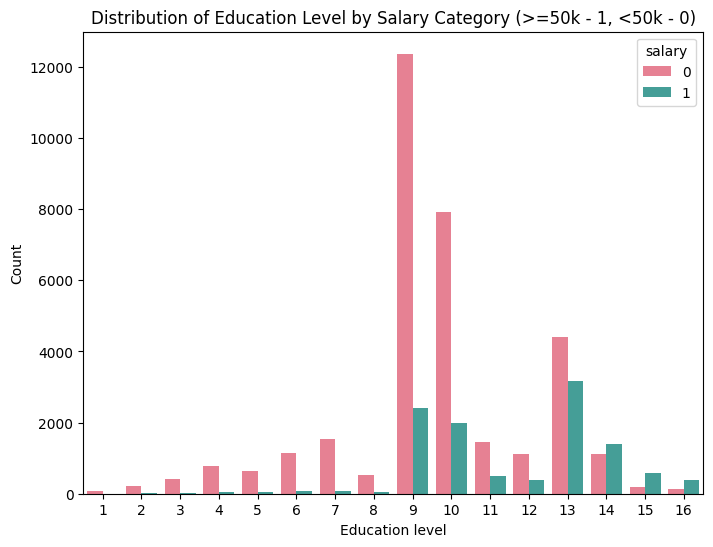

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = 'education-num', hue = 'salary', palette = 'husl')
plt.title("Distribution of Education Level by Salary Category (>=50k - 1, <50k - 0)")
plt.xlabel('Education level')
plt.ylabel('Count')

([<matplotlib.axis.XTick at 0x2194cb3a6c0>,
 [Text(0, 0, '17'),
  Text(3, 0, '20'),
  Text(6, 0, '23'),
  Text(9, 0, '26'),
  Text(12, 0, '29'),
  Text(15, 0, '32'),
  Text(18, 0, '35'),
  Text(21, 0, '38'),
  Text(24, 0, '41'),
  Text(27, 0, '44'),
  Text(30, 0, '47'),
  Text(33, 0, '50'),
  Text(36, 0, '53'),
  Text(39, 0, '56'),
  Text(42, 0, '59'),
  Text(45, 0, '62'),
  Text(48, 0, '65'),
  Text(51, 0, '68'),
  Text(54, 0, '71'),
  Text(57, 0, '74'),
  Text(60, 0, '77'),
  Text(63, 0, '80'),
  Text(66, 0, '83'),
  Text(69, 0, '86'),
  Text(72, 0, '89'),
  Text(75, 0, ''),
  Text(78, 0, ''),
  Text(81, 0, ''),
  Text(84, 0, ''),
  Text(87, 0, ''),
  Text(90, 0, '')])

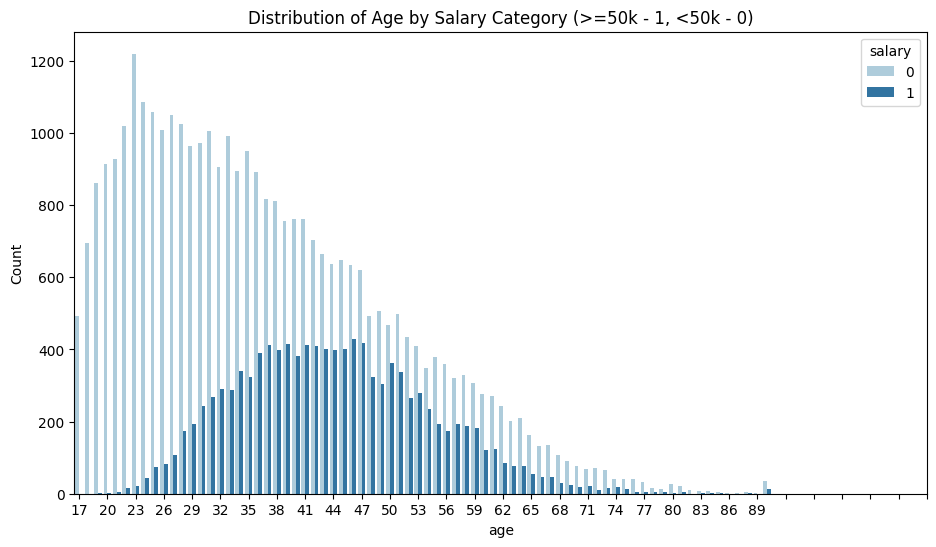

In [11]:
plt.figure(figsize=(11, 6))
sns.countplot(data = df, x = 'age', hue = 'salary', palette = 'Paired')
plt.title("Distribution of Age by Salary Category (>=50k - 1, <50k - 0)")
plt.xlabel('age')
plt.ylabel('Count')
plt.xticks(ticks=range(0, df['age'].max()+1, 3))

Text(0.5, 0.98, 'Race and Salary (>=50k - 1, <50k - 0)  Distribution by Gender (Male - 1, Female - 0)')

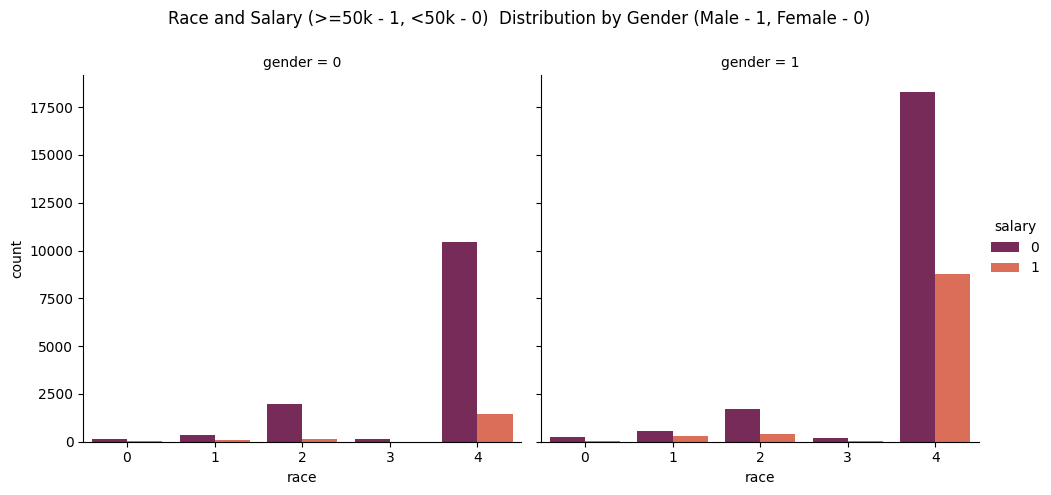

In [12]:
sns.catplot(
    data=df, kind='count',
    x='race', hue='salary', col='gender',
    palette='rocket', height=5, aspect=1
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Race and Salary (>=50k - 1, <50k - 0)  Distribution by Gender (Male - 1, Female - 0)")

Text(0.5, 1.0, 'Correlation Heatmap')

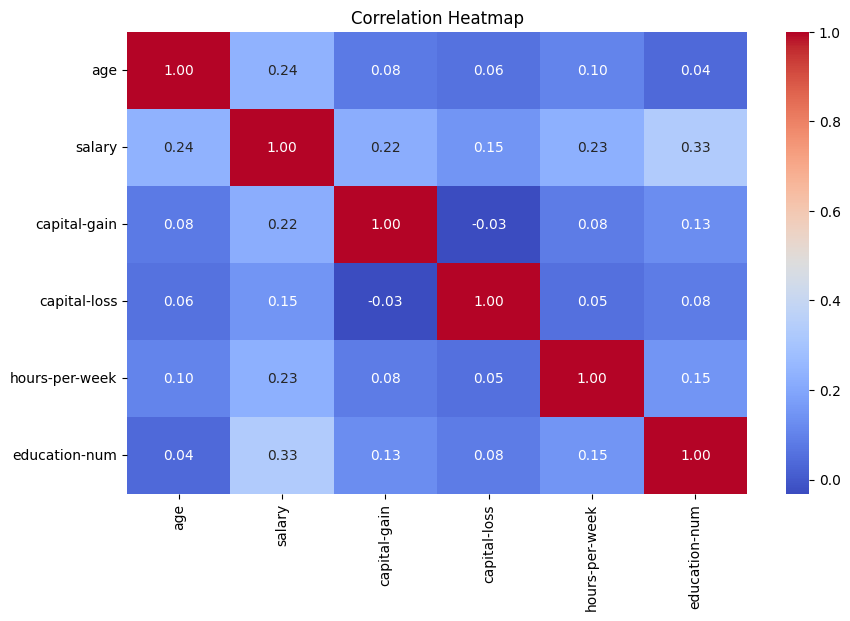

In [13]:
cols = ['age', 'salary', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
corr = df[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

Text(0, 0.5, 'Count (log)')

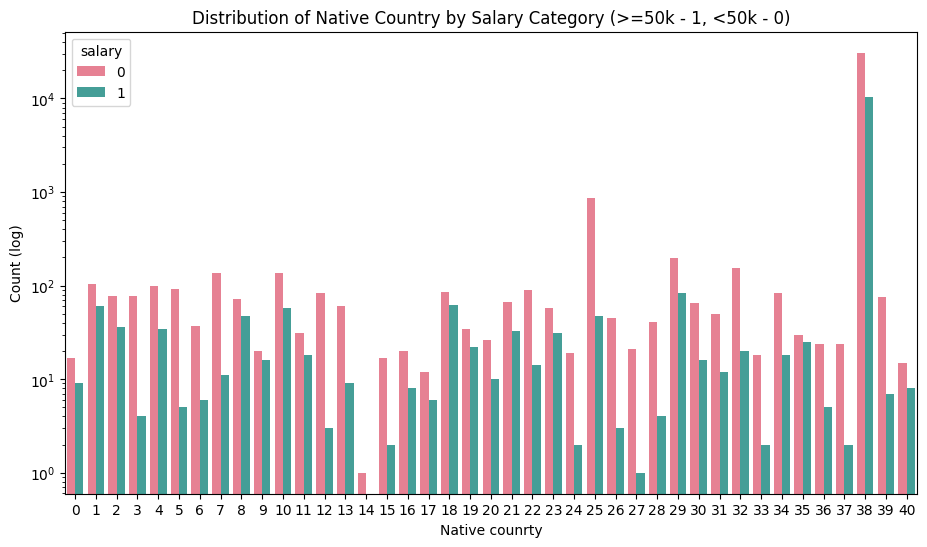

In [14]:
plt.figure(figsize=(11, 6))
sns.countplot(data = df, x = 'native-country', hue = 'salary', palette = 'husl')
plt.yscale('log')
plt.title("Distribution of Native Country by Salary Category (>=50k - 1, <50k - 0)")
plt.xlabel('Native counrty')
plt.ylabel('Count (log)')

Text(0.5, 0.98, 'R and Salary (>=50k - 1, <50k - 0)  Distribution by Gender (Male - 1, Female - 0)')

<Figure size 800x600 with 0 Axes>

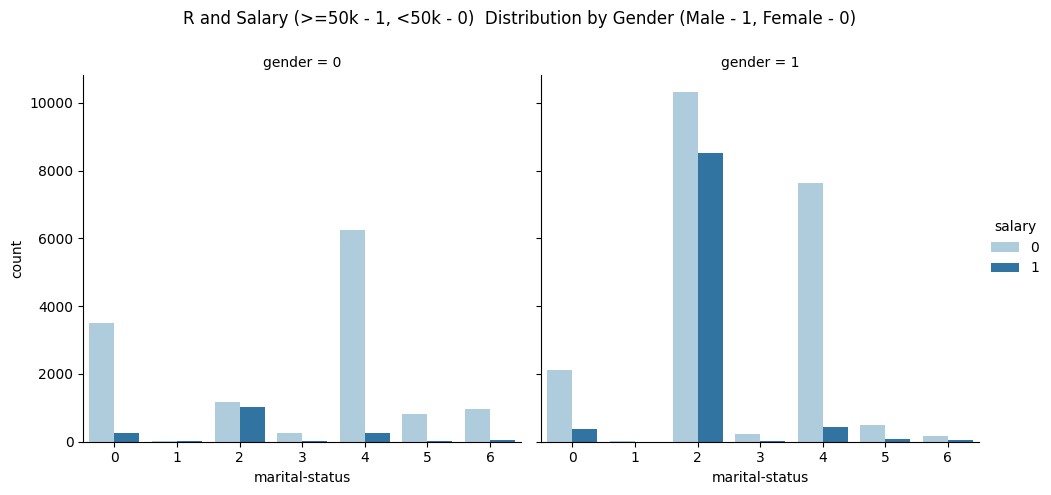

In [15]:
plt.figure(figsize = (8,6))
sns.catplot(data = df, kind = 'count',
            x = 'marital-status', hue = 'salary',
            col = 'gender', palette='Paired', height=5, aspect=1
           )
plt.subplots_adjust(top=0.85)
plt.suptitle("R and Salary (>=50k - 1, <50k - 0)  Distribution by Gender (Male - 1, Female - 0)")

# 💪 Model training 
To predict whether an individual earns more than $50,000 per year, we will apply several classification algorithms and compare their performance. We begin with Logistic Regression, a simple and interpretable baseline model that is well-suited for binary classification problems. Next, we introduce a Decision Tree, which captures non-linear relationships and allows for easy interpretation of feature importance. To enhance predictive power and reduce overfitting, we implement a Random Forest, an ensemble method that combines multiple decision trees to improve accuracy and robustness. Finally, we utilize XGBoost, a powerful gradient boosting algorithm known for its high performance and efficiency in structured data problems. By evaluating each model, we aim to identify the most effective approach for income prediction.

In [16]:
X = df.drop(['salary','education', 'fnlwgt'], axis=1)
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

## 🧐 Logistic Regression

In [17]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8240
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1692
           1       0.75      0.46      0.57       570

    accuracy                           0.82      2262
   macro avg       0.79      0.70      0.73      2262
weighted avg       0.82      0.82      0.81      2262



## 🧐 Decision tree

In [18]:
tree_model = DecisionTreeClassifier(random_state = 42)
tree_model.fit(X_train,y_train)

y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f"Accuracy: {accuracy_tree:.4f}")
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.8103
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1692
           1       0.64      0.58      0.60       570

    accuracy                           0.81      2262
   macro avg       0.75      0.73      0.74      2262
weighted avg       0.80      0.81      0.81      2262



## 🧐 Random Forest

In [19]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracys: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Accuracys: 0.8435
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1692
           1       0.73      0.61      0.66       570

    accuracy                           0.84      2262
   macro avg       0.80      0.76      0.78      2262
weighted avg       0.84      0.84      0.84      2262



## 🧐 XGBOOST

In [20]:
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.874

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1692
           1       0.82      0.64      0.72       570

    accuracy                           0.87      2262
   macro avg       0.85      0.80      0.82      2262
weighted avg       0.87      0.87      0.87      2262



## 📈 Conclusion

In this project, we explored multiple classification models to predict whether an individual's income exceeds $50,000 annually. After preprocessing the data and transforming categorical variables into numeric format, we trained and evaluated four different algorithms: Logistic Regression, Decision Tree, Random Forest, and XGBoost.

Among all models, XGBoost delivered the best performance with an accuracy of 0.875, along with strong precision and recall scores, particularly for the majority class. Its macro average F1-score of 0.82 and weighted average of 0.87 reflect its overall robustness in handling the data's imbalance and complexity.

The Random Forest model followed with an accuracy of 0.8439, showing good predictive power, especially for the majority class, though with slightly weaker recall on the minority class. The Decision Tree and Logistic Regression models achieved lower accuracies of 0.8103 and 0.8240 respectively, performing similarly in terms of precision and recall for the minority class.

These results demonstrate that ensemble methods—particularly XGBoost—are highly effective for income classification tasks, offering a balance between accuracy and the ability to capture complex patterns in the data.